<center><img src="https://news.illinois.edu/files/6367/543635/116641.jpg" alt="University of Illinois" width="250"/></center>

# Machine Learning in Finance Lab: Week 05

## deadline 2022-02-20 ##


* Yu-Ching Liao <ycliao3@illinois.edu>

# Basic Import

In [1]:
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import scipy.stats as stats
import pylab

from numpy import sqrt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.decomposition import PCA
from sklearn import svm

warnings.filterwarnings("ignore")

In [2]:
TY = pd.read_csv(
    "/Users/yu-chingliao/Library/CloudStorage/GoogleDrive-josephliao0127@gmail.com/My Drive/Note/UIUC/Spring_2023/IE517A_Machine Learning in Finance Lab/Lecture Notes/Week 05/hw5_treasury yield curve data.csv",
    index_col="Date")
TY.index = pd.to_datetime(TY.index)

# Part 1: EDA

## Scatter Plot Metrics 

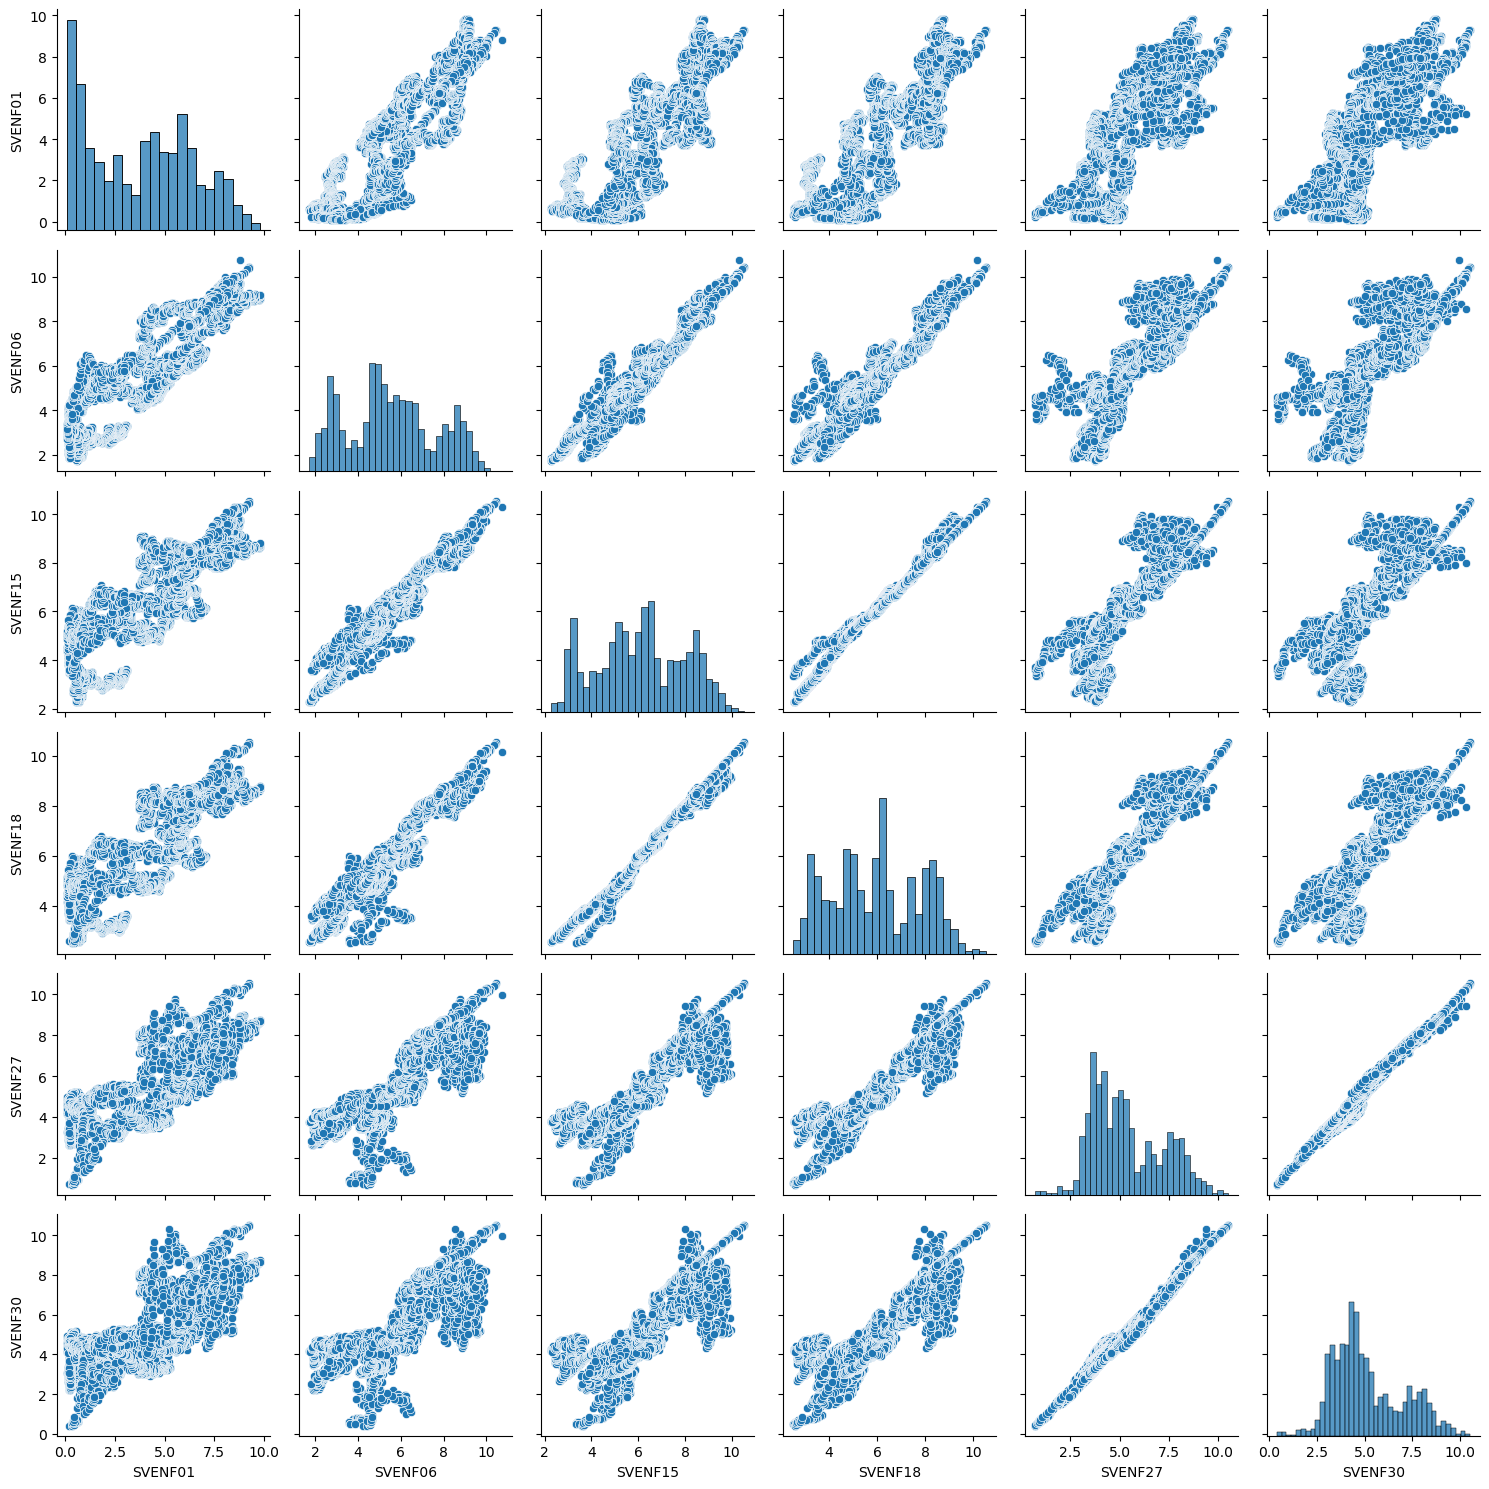

In [3]:
cols = ['SVENF01' , 'SVENF06', 'SVENF15', 'SVENF18', 'SVENF27', 'SVENF30']
sns.pairplot(TY[cols], size = 2.5)
plt.tight_layout()
plt.show()

## Print the Shape Out

In [4]:
print("The number of Columns is", TY.shape[1], ".")
print("The number of Rows is", TY.shape[0], ".")

The number of Columns is 31 .
The number of Rows is 8071 .


## Print the Nature Out 

In [5]:
nl = []
sl = []
ol = []

for label in TY.columns:
    Number = 0
    String = 0
    Other = 0

    for i in TY[label]:
        if type(i) == str:
            String += 1
        elif (type(i) == int) or (type(i) == float):
            Number += 1
        else:
            Other += 1
    nl.append(Number)
    sl.append(String)
    ol.append(Other)

Output = {
    "Label": TY.columns,
    "Number": nl,
    "String": sl,
    "Other": ol
}
Output = pd.DataFrame(Output)
Output

,Label,Number,String,Other
0,SVENF01,8071,0,0
1,SVENF02,8071,0,0
2,SVENF03,8071,0,0
3,SVENF04,8071,0,0
4,SVENF05,8071,0,0
5,SVENF06,8071,0,0
6,SVENF07,8071,0,0
7,SVENF08,8071,0,0
8,SVENF09,8071,0,0
9,SVENF10,8071,0,0


## Summary of Statistics

In [6]:
numer = np.array(TY['SVENF01'])

#Mean, Var and Std
print('μ =', numer.mean(), 'Var =', numer.var(), "σ =", numer.std(),'\n')

#quantiles
def q(ds, n_q):
    result = []
    for i in range(n_q+1):
        result.append(np.percentile(ds, i*(100)/n_q))
    return result
print("Boundaries for 4 Equal Percentiles\n",q(numer, 4), "\n")

#10 equal percenetiles
print("Boundaries for 10 Equal Percentiles\n",q(numer, 10), "\n")

#catagorical analysis
cat = list(TY.columns)
neat_cat = list(set(cat))
print("Unique Label Values \n", neat_cat)

#count catagorics 
counts = []
for i in neat_cat:
    counts.append(sum(TY.columns == i))
Output = {
    "Types" : neat_cat,
    "Counts" : counts
}
Output = pd.DataFrame(Output)
Output = Output.set_index("Types")
Output

μ = 3.7853113740552597 Var = 7.011351664593713 σ = 2.647895705006848 

Boundaries for 4 Equal Percentiles
 [0.0727, 1.14405, 3.9865, 5.9015, 9.8138] 

Boundaries for 10 Equal Percentiles
 [0.0727, 0.3326, 0.8002, 1.5379, 2.6503, 3.9865, 4.705, 5.6197, 6.2687, 7.5553, 9.8138] 

Unique Label Values 
 ['SVENF30', 'SVENF15', 'SVENF02', 'SVENF12', 'SVENF03', 'SVENF04', 'SVENF16', 'SVENF21', 'SVENF23', 'SVENF27', 'SVENF05', 'SVENF29', 'SVENF25', 'SVENF01', 'SVENF24', 'SVENF14', 'SVENF18', 'SVENF06', 'SVENF11', 'SVENF13', 'SVENF22', 'SVENF19', 'SVENF28', 'SVENF09', 'SVENF08', 'SVENF17', 'Adj_Close', 'SVENF07', 'SVENF26', 'SVENF10', 'SVENF20']


,Counts
Types,
SVENF30,1
SVENF15,1
SVENF02,1
SVENF12,1
SVENF03,1
SVENF04,1
SVENF16,1
SVENF21,1
SVENF23,1


## QQ-Plot 

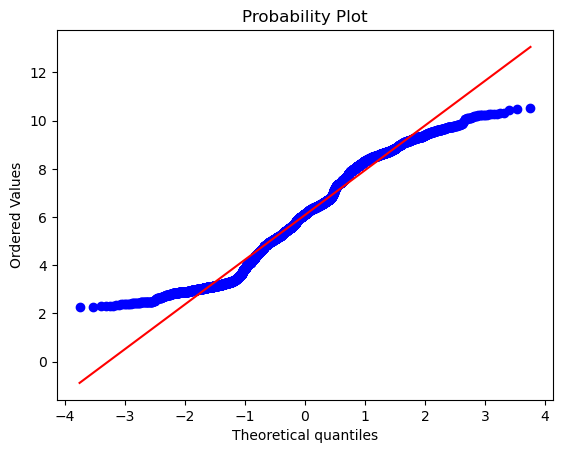

P-Value: 0.0
Reject H0: Client_Trade_Percentage is Normally distributed.


In [7]:
stats.probplot(TY['SVENF15'], dist="norm", plot=pylab)
pylab.show()
print("P-Value:", stats.normaltest(TY['SVENF01'])[1])
print("Reject H0: Client_Trade_Percentage is Normally distributed.")

## Print Summary of data 

In [8]:
summary = TY.describe()
print(summary)

           SVENF01      SVENF02      SVENF03      SVENF04      SVENF05  \
count  8071.000000  8071.000000  8071.000000  8071.000000  8071.000000   
mean      3.785311     4.258972     4.669363     5.022430     5.318493   
std       2.648060     2.498137     2.341348     2.221632     2.137801   
min       0.072700     0.327300     0.630300     1.013000     1.424500   
25%       1.144050     1.865600     2.536550     3.023050     3.544700   
50%       3.986500     4.393300     4.505500     4.718900     5.051300   
75%       5.901500     6.221250     6.461300     6.626600     6.779550   
max       9.813800     9.887800    10.145600    10.459900    10.649900   

           SVENF06      SVENF07      SVENF08      SVENF09      SVENF10  ...  \
count  8071.000000  8071.000000  8071.000000  8071.000000  8071.000000  ...   
mean      5.559644     5.750071     5.895135     6.000596     6.072112  ...   
std       2.080405     2.040337     2.010786     1.987244     1.966960  ...   
min       1.69820

## Plot out data

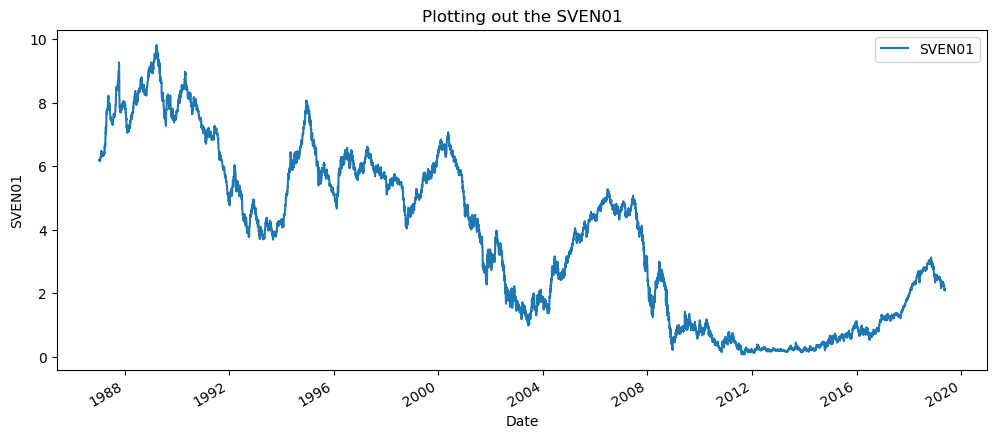

In [9]:
plt.figure(figsize=[12,5])
plt.plot(TY['SVENF01'], label = 'SVEN01')
plt.xlabel('Date')
plt.ylabel('SVEN01')
plt.title('Plotting out the SVEN01')
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

## Cross Plotting Pairs of Attributes (Scatter Plot)¶

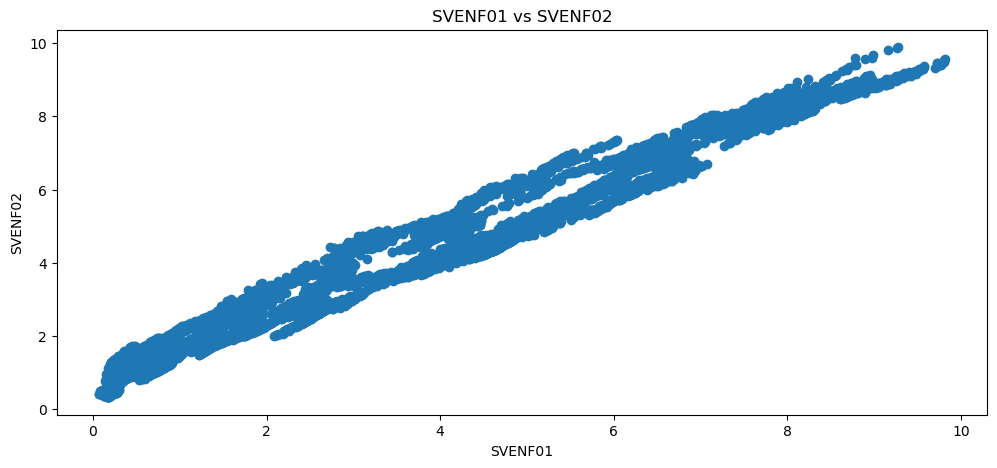

In [10]:
plt.figure(figsize=[12,5])
plt.scatter(TY['SVENF01'], TY['SVENF02'])
plt.title("SVENF01 vs SVENF02")
plt.xlabel('SVENF01')
plt.ylabel('SVENF02')
plt.show()

##  Correlation 

In [11]:
TY.corr()

,SVENF01,SVENF02,SVENF03,SVENF04,SVENF05,SVENF06,SVENF07,SVENF08,SVENF09,SVENF10,...,SVENF22,SVENF23,SVENF24,SVENF25,SVENF26,SVENF27,SVENF28,SVENF29,SVENF30,Adj_Close
SVENF01,1.000000,0.986417,0.958364,0.924637,0.890691,0.860385,0.835864,0.817792,0.805833,0.799116,...,0.818245,0.813380,0.806650,0.798100,0.787826,0.775963,0.762679,0.748167,0.732632,-0.849562
SVENF02,0.986417,1.000000,0.991325,0.971026,0.945906,0.920994,0.899469,0.882818,0.871309,0.864483,...,0.880253,0.875325,0.868506,0.859830,0.849384,0.837300,0.823744,0.808910,0.793006,-0.884194
SVENF03,0.958364,0.991325,1.000000,0.993681,0.978891,0.960996,0.943810,0.929497,0.918916,0.912072,...,0.917414,0.912155,0.905080,0.896211,0.885620,0.873430,0.859797,0.844907,0.828962,-0.898952
SVENF04,0.924637,0.971026,0.993681,1.000000,0.995480,0.985206,0.973186,0.962005,0.952978,0.946523,...,0.935990,0.929804,0.921925,0.912369,0.901202,0.888536,0.874519,0.859327,0.843153,-0.903707
SVENF05,0.890691,0.945906,0.978891,0.995480,1.000000,0.996934,0.990180,0.982494,0.975478,0.969858,...,0.941744,0.934145,0.924980,0.914267,0.902072,0.888503,0.873704,0.857846,0.841114,-0.903779
SVENF06,0.860385,0.920994,0.960996,0.985206,0.996934,1.000000,0.998022,0.993749,0.988922,0.984458,...,0.940299,0.931069,0.920375,0.908243,0.894745,0.879994,0.864134,0.847334,0.829776,-0.902343
SVENF07,0.835864,0.899469,0.943810,0.973186,0.990180,0.998022,1.000000,0.998756,0.996054,0.992905,...,0.936188,0.925358,0.913126,0.899534,0.884664,0.868636,0.851601,0.833730,0.815205,-0.901242
SVENF08,0.817792,0.882818,0.929497,0.962005,0.982494,0.993749,0.998756,1.000000,0.999202,0.997388,...,0.932400,0.920175,0.906572,0.891646,0.875496,0.858251,0.840071,0.821133,0.801622,-0.901317
SVENF09,0.805833,0.871309,0.918916,0.952978,0.975478,0.988922,0.996054,0.999202,1.000000,0.999443,...,0.930524,0.917211,0.902507,0.886484,0.869255,0.850962,0.831773,0.811874,0.791457,-0.902706
SVENF10,0.799116,0.864483,0.912072,0.946523,0.969858,0.984458,0.992905,0.997388,0.999443,1.000000,...,0.931140,0.917093,0.901615,0.884793,0.866751,0.847646,0.827655,0.806972,0.785796,-0.905134


## Correlation Visualization

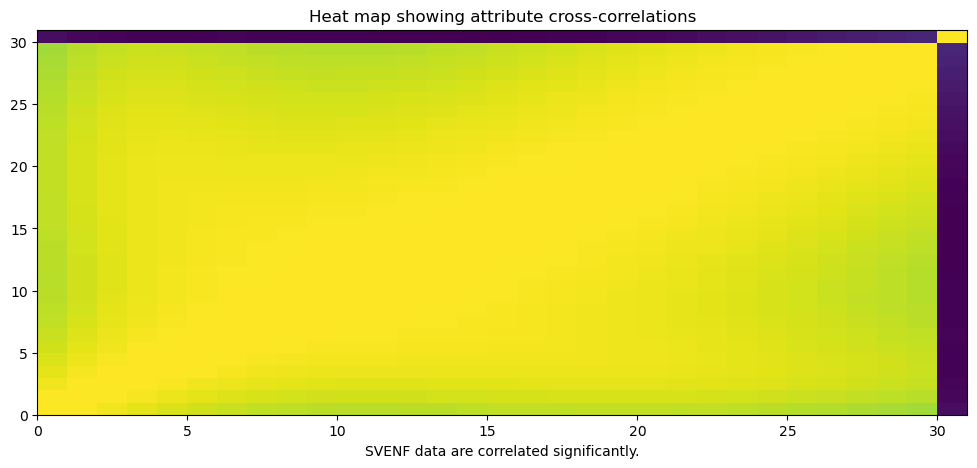

In [12]:
#calculate correlations between real-valued attributes
corMat = pd.DataFrame(TY.corr())
#visualize correlations using heatmap
plt.figure(figsize=[12,5])
plt.title("Heat map showing attribute cross‐correlations")
plt.pcolor(corMat)
plt.xlabel('SVENF data are correlated significantly.')
plt.show()

# Part 2: PCA

In [13]:
X = TY.drop('Adj_Close', axis = 1)
before = PCA(n_components=len(X.columns))
before.fit_transform(X)
print("Explained Variance Ratio with all components:\n", before.explained_variance_ratio_, "\n")
print("Culmulative Variance Ratio with all components:\n", before.explained_variance_ratio_.cumsum(), "\n\n")

after = PCA(n_components=3)
after.fit_transform(X)
print("Explained Variance Ratio with 3 components:\n",after.explained_variance_ratio_, "\n")
print("Culmulative Variance Ratio with 3 components:\n", after.explained_variance_ratio_.cumsum())

Explained Variance Ratio with all components:
 [9.25027254e-01 3.77198563e-02 3.11962115e-02 5.11829721e-03
 8.45006479e-04 8.14071111e-05 1.06386900e-05 1.23073879e-06
 8.99497477e-08 7.14094977e-09 4.89071592e-10 3.83422436e-11
 8.63162713e-12 7.54060102e-12 7.44722038e-12 7.41409677e-12
 7.37633844e-12 7.36922042e-12 7.21033060e-12 7.16011018e-12
 7.08499808e-12 7.01615861e-12 6.97953948e-12 6.83297854e-12
 6.78790385e-12 6.76011093e-12 6.68796631e-12 6.63106214e-12
 6.57322725e-12 6.42225375e-12] 

Culmulative Variance Ratio with all components:
 [0.92502725 0.96274711 0.99394332 0.99906162 0.99990663 0.99998803
 0.99999867 0.9999999  0.99999999 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.        ] 


Explained Variance Ratio with 3 components:
 [0.92502725 0.03771986 0.03119621] 

Culmulative Variance Ratio with 3 components:


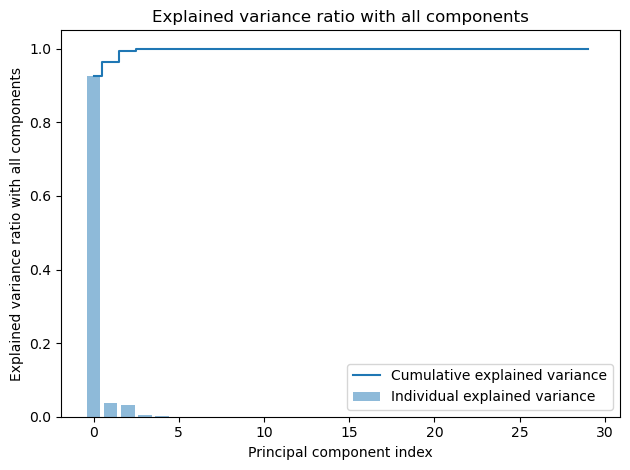

In [14]:
plt.bar(range(0,len(before.explained_variance_ratio_)), before.explained_variance_ratio_, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(before.explained_variance_ratio_.cumsum())), before.explained_variance_ratio_.cumsum(), where='mid',label='Cumulative explained variance')

plt.title('Explained variance ratio with all components')
plt.ylabel('Explained variance ratio with all components')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

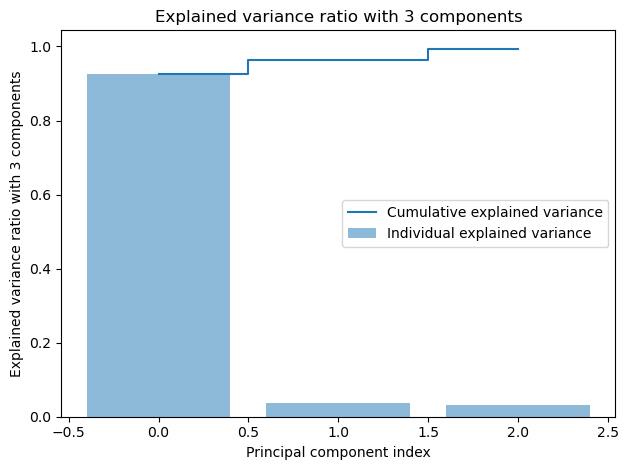

In [15]:
plt.bar(range(0,len(after.explained_variance_ratio_)), after.explained_variance_ratio_, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(after.explained_variance_ratio_.cumsum())), after.explained_variance_ratio_.cumsum(), where='mid',label='Cumulative explained variance')

plt.title('Explained variance ratio with 3 components')
plt.ylabel('Explained variance ratio with 3 components')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Part 3: Linear Regression VS SVM

## Linear Regression with all features 

Training Set R_Square: 0.8916880358469877
Training Set RMSE: 0.7766533040370089
Testing Set R_Square: 0.8922659110988628
Testing Set RMSE: 0.7823695855059912


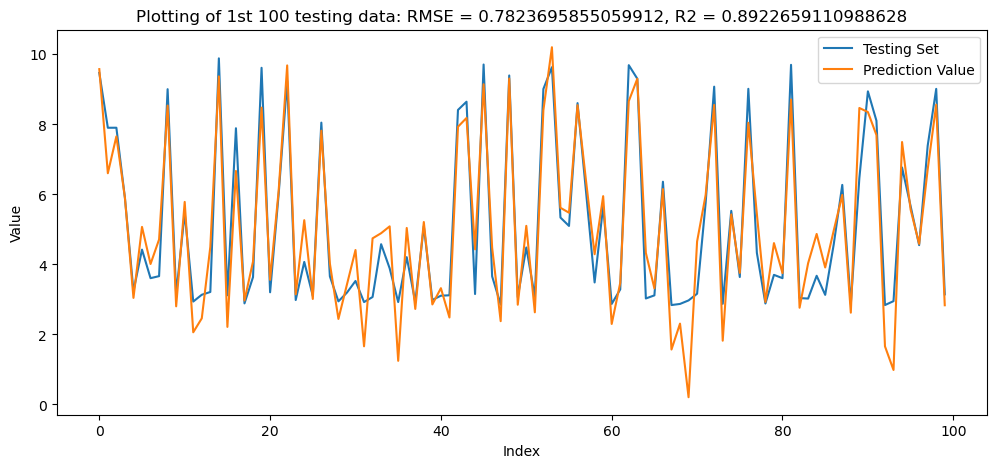

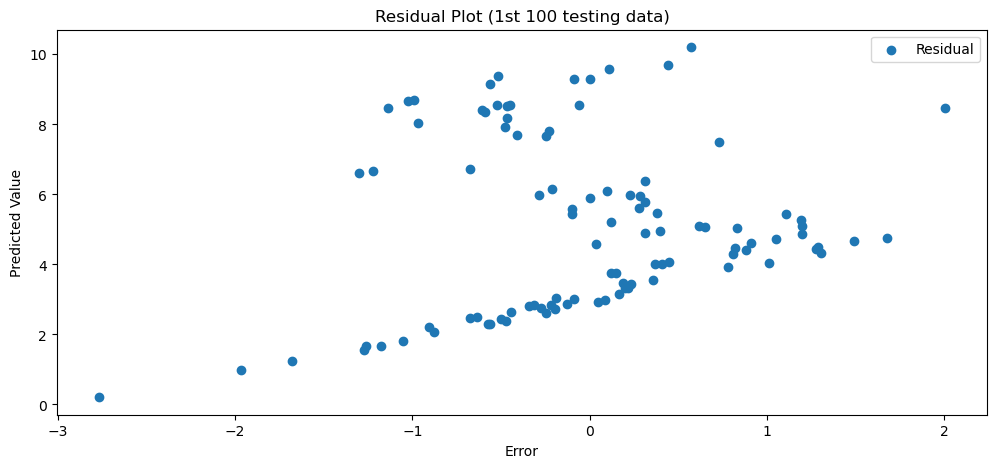

In [20]:
#Getting features and labels
X = TY.drop('Adj_Close', axis = 1).values
y = TY['Adj_Close'].values

#Testing Sets Spliting
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42) 

#Linear Regression
reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred_train = reg.predict(X_train)
y_pred = reg.predict(X_test)

mse = MSE(y_pred, y_test)
r2 = R2(y_pred, y_test)

print("Training Set R_Square:", R2(y_pred_train, y_train))
print("Training Set RMSE:", sqrt(MSE(y_pred_train, y_train)))
print("Testing Set R_Square:", r2)
print("Testing Set RMSE:", sqrt(mse))

plt.figure(figsize=[12,5])
plt.plot(y_test[:100], label = "Testing Set")
plt.plot(y_pred[:100], label = "Prediction Value")
plt.legend()
plt.title("Plotting of 1st 100 testing data: RMSE = "+str(sqrt(mse))+", R2 = "+str(r2))
plt.xlabel("Index")
plt.ylabel("Value")
plt.show()

plt.figure(figsize=[12,5])
plt.scatter(y_pred[:100] - y_test[:100], y_pred[:100], label = "Residual")
plt.xlabel("Error")
plt.ylabel("Predicted Value")
plt.title("Residual Plot (1st 100 testing data)")
plt.legend()
plt.show()

## Linear Regression with PCA 

Training Set R_Square: 0.8471141364163036
Training Set RMSE: 0.904712305616479
Testing Set R_Square: 0.844482552110021
Testing Set RMSE: 0.9236577822901371


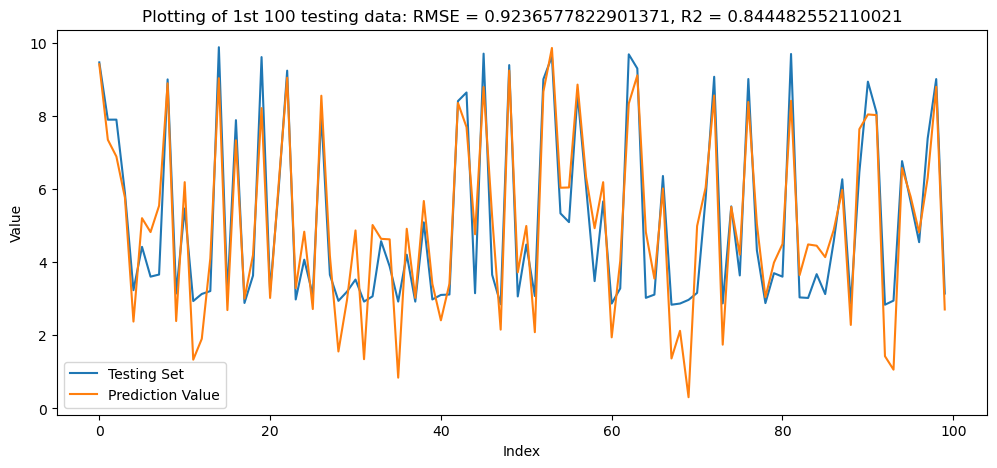

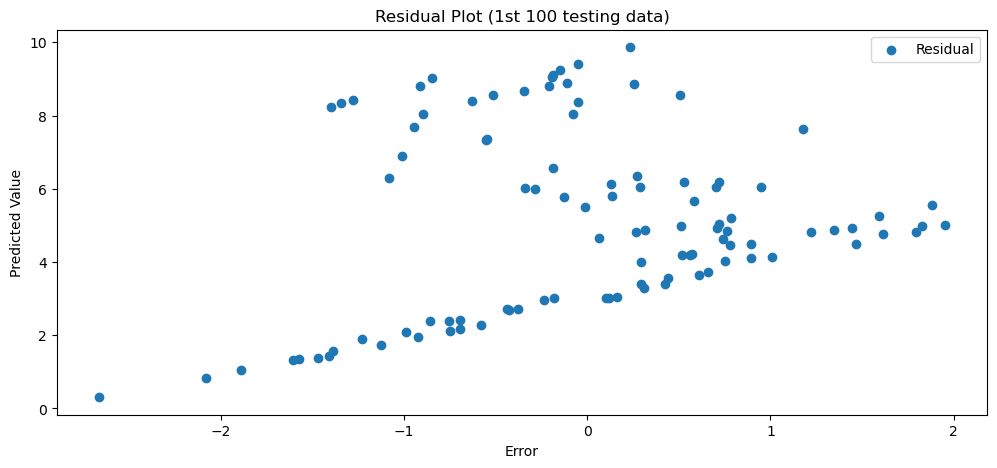

In [22]:
#Getting features and labels
X = TY.drop('Adj_Close', axis = 1).values
y = TY['Adj_Close'].values

#PCA
pca = PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

#Testing Set Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42) 

#Linear Regression
reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred_train = reg.predict(X_train)
y_pred = reg.predict(X_test)

mse = MSE(y_pred, y_test)
r2 = R2(y_pred, y_test)

print("Training Set R_Square:", R2(y_pred_train, y_train))
print("Training Set RMSE:", sqrt(MSE(y_pred_train, y_train)))
print("Testing Set R_Square:", r2)
print("Testing Set RMSE:", sqrt(mse))

plt.figure(figsize=[12,5])
plt.plot(y_test[:100], label = "Testing Set")
plt.plot(y_pred[:100], label = "Prediction Value")
plt.legend()
plt.title("Plotting of 1st 100 testing data: RMSE = "+str(sqrt(mse))+", R2 = "+str(r2))
plt.xlabel("Index")
plt.ylabel("Value")
plt.show()

plt.figure(figsize=[12,5])
plt.scatter(y_pred[:100] - y_test[:100], y_pred[:100], label = "Residual")
plt.xlabel("Error")
plt.ylabel("Predicted Value")
plt.title("Residual Plot (1st 100 testing data)")
plt.legend()
plt.show()

## SVM with all features

Training Set R_Square: 0.8897485893439943
Training Set RMSE: 0.8114336976442862
Testing Set R_Square: 0.890010906316674
Testing Set RMSE: 0.8209562317057244


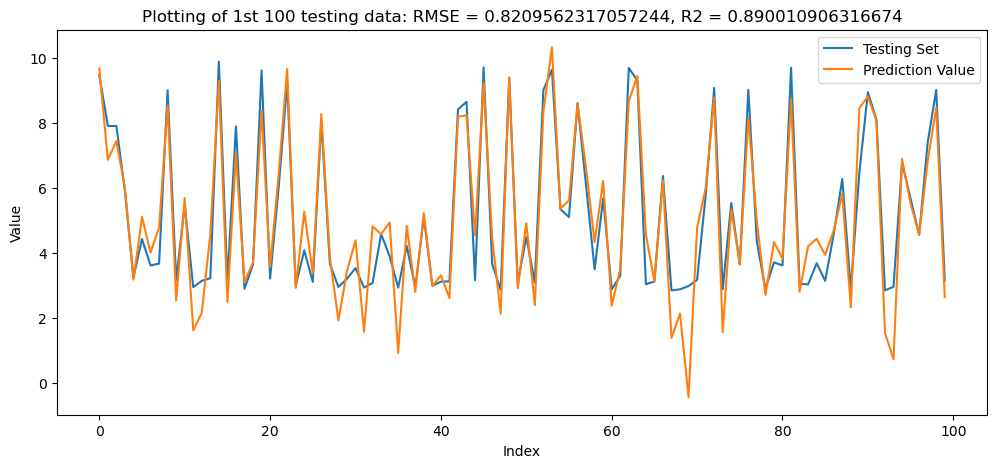

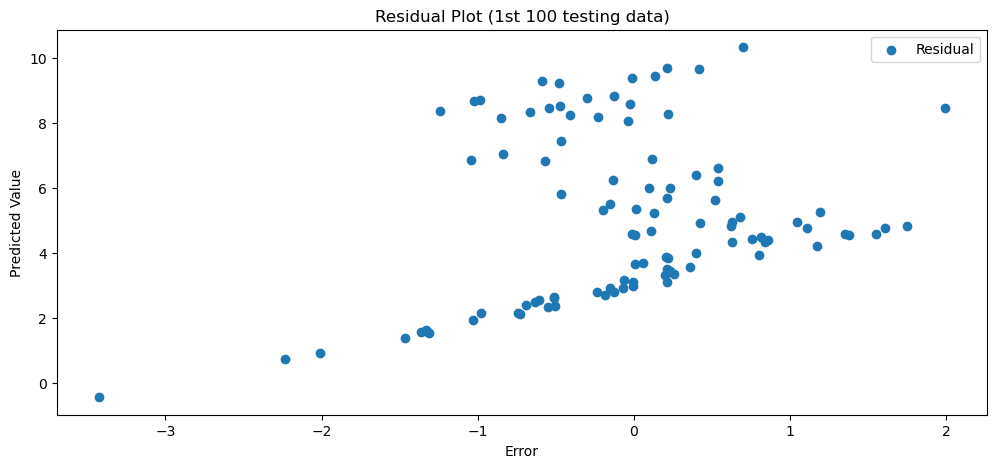

In [24]:
#Getting features and labels
X = TY.drop('Adj_Close', axis = 1).values
y = TY['Adj_Close'].values

#Testing Sets Spliting
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42) 

#SVM
clf = svm.SVR(kernel='linear')
clf.fit(X_train, y_train)

y_pred_train = clf.predict(X_train)
y_pred = clf.predict(X_test)

mse = MSE(y_pred, y_test)
r2 = R2(y_pred, y_test)

print("Training Set R_Square:", R2(y_pred_train, y_train))
print("Training Set RMSE:", sqrt(MSE(y_pred_train, y_train)))
print("Testing Set R_Square:", r2)
print("Testing Set RMSE:", sqrt(mse))


plt.figure(figsize=[12,5])
plt.plot(y_test[:100], label = "Testing Set")
plt.plot(y_pred[:100], label = "Prediction Value")
plt.legend()
plt.title("Plotting of 1st 100 testing data: RMSE = "+str(sqrt(mse))+", R2 = "+str(r2))
plt.xlabel("Index")
plt.ylabel("Value")
plt.show()

plt.figure(figsize=[12,5])
plt.scatter(y_pred[:100] - y_test[:100],y_pred[:100],  label = "Residual")
plt.xlabel("Error")
plt.ylabel("Predicted Value")
plt.title("Residual Plot (1st 100 testing data)")
plt.legend()
plt.show()

## SVM with PCA

Training Set R_Square: 0.8586865830328192
Training Set RMSE: 0.9213218039316622
Testing Set R_Square: 0.8564207442610645
Testing Set RMSE: 0.9413867958199634


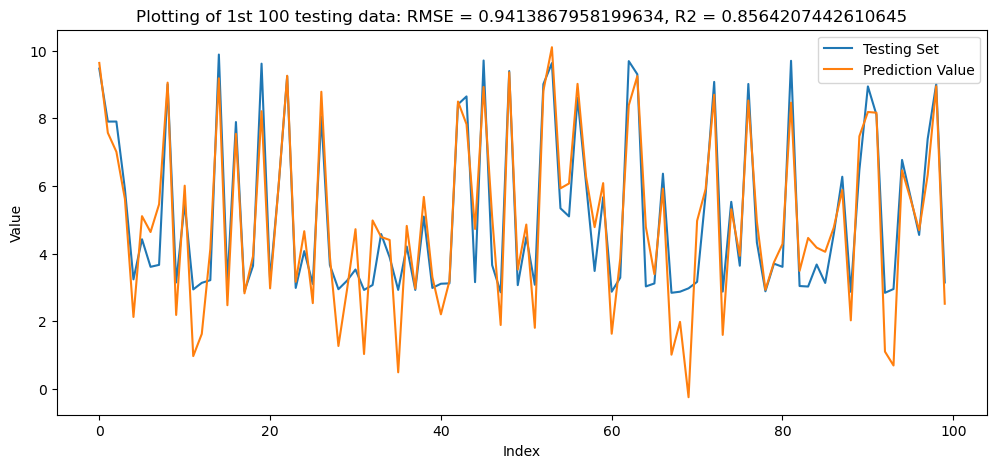

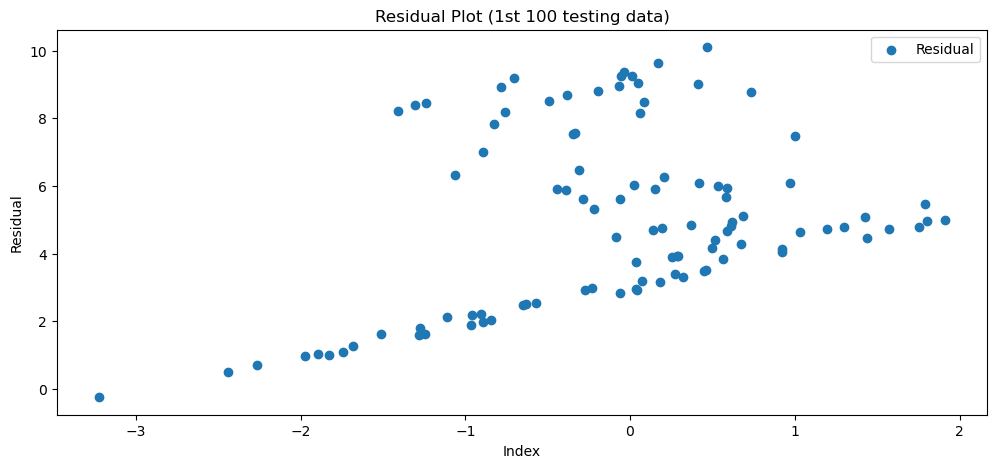

In [25]:
#Getting features and labels
X = TY.drop('Adj_Close', axis = 1).values
y = TY['Adj_Close'].values

#PCA
pca = PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

#Testing Set Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42) 

#SVM
clf = svm.SVR(kernel='linear')
clf.fit(X_train, y_train)

y_pred_train = clf.predict(X_train)
y_pred = clf.predict(X_test)

mse = MSE(y_pred, y_test)
r2 = R2(y_pred, y_test)

print("Training Set R_Square:", R2(y_pred_train, y_train))
print("Training Set RMSE:", sqrt(MSE(y_pred_train, y_train)))
print("Testing Set R_Square:", r2)
print("Testing Set RMSE:", sqrt(mse))

mse = MSE(y_pred, y_test)
r2 = R2(y_pred, y_test)
plt.figure(figsize=[12,5])
plt.plot(y_test[:100], label = "Testing Set")
plt.plot(y_pred[:100], label = "Prediction Value")
plt.legend()
plt.title("Plotting of 1st 100 testing data: RMSE = "+str(sqrt(mse))+", R2 = "+str(r2))
plt.xlabel("Index")
plt.ylabel("Value")
plt.show()

plt.figure(figsize=[12,5])
plt.scatter(y_pred[:100] - y_test[:100], y_pred[:100], label = "Residual")
plt.xlabel("Index")
plt.ylabel("Residual")
plt.title("Residual Plot (1st 100 testing data)")
plt.legend()
plt.show()

# Signing

In [1]:
print("My name is Yu-Ching Liao")
print("My NetID is: 656724372")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Yu-Ching Liao
My NetID is: 656724372
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.


<center><img src="https://news.illinois.edu/files/6367/543635/116641.jpg" alt="University of Illinois" width="250"/></center>